<a href="https://colab.research.google.com/github/sajjad-yazdanparast/sentiment_analysis/blob/master/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from gensim.models import KeyedVectors
import pandas as pd 
import numpy as np 

In [ ]:
# def gunzip(file_path,output_path):
#     with gzip.open(file_path,"rb") as f_in, open(output_path,"wb") as f_out:
#         shutil.copyfileobj(f_in, f_out)
# gunzip('/content/drive/My Drive/parto tech/ GoogleNews-vectors-negative300.bin.gz','/content/drive/My Drive/parto tech/word2vec.bin')

In [7]:
model = KeyedVectors.load_word2vec_format(open('/content/drive/My Drive/parto tech/sentiment_analysis/word2vec.bin','rb'), binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [2]:
train = pd.read_csv('/content/drive/My Drive/parto tech/sentiment_analysis/train.csv') 
test = pd.read_csv('/content/drive/My Drive/parto tech/sentiment_analysis/test.csv')

In [8]:
def remove_atsign (text) :
  return text.replace('@user',' ')

In [9]:
train['tweet'] = train['tweet'].apply(remove_atsign)

In [10]:
def sentence2vec(row,w2v) :
  vector = np.zeros((1,300)) 
  words = row.split()
  count = 0 
  for word in words :
    try :
      vector += w2v[word].reshape((1,300))
      count +=1 
    except KeyError :
      continue 
  if count != 0 :
    return vector/count
  return vector

In [28]:
hated_sentences = train[train['label']==1]['tweet']
positive_sentences = train[train['label']==0]['tweet']
hated_vecs = np.concatenate([sentence2vec(z,model) for z in hated_sentences])
positive_vecs = np.concatenate([sentence2vec(z,model) for z in positive_sentences])
from sklearn.manifold import TSNE
ts = TSNE (2)
hated_vecs = ts.fit_transform(hated_vecs)
positive_vecs = ts.fit_transform(positive_vecs)

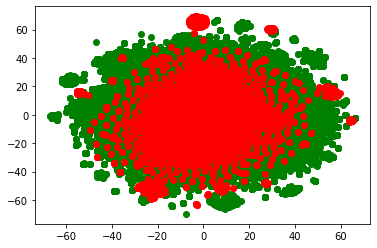

In [30]:
import matplotlib.pyplot as plt 
for row in positive_vecs :
  plt.plot(row[0],row[1],marker='o',color='g')
for row in hated_vecs :
  plt.plot(row[0],row[1],marker='o',color='r')

In [31]:
X = np.concatenate((positive_vecs,hated_vecs))
Y = np.concatenate( (np.zeros(len(positive_vecs)) , np.ones(len(hated_vecs))))

In [32]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y,random_state=101)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import *
# model_ = LogisticRegression(random_state=101)
# model_ = SVC(gamma='auto')
# model_ = GaussianNB()
model_ = LogisticRegression()
model_.fit(x_train,y_train)
model_.score(x_test,y_test)


0.9317982730571893

In [ ]:
vectors = np.concatenate([sentence2vec(z,model) for z in train['tweet']])

In [ ]:
np.shape(vectors)

(31962, 300)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(vectors,train['label'],random_state=101)

In [ ]:
print(len(train[train['label']==0]))
print(len(train[train['label']==1]))
print(len(train[train['label']==0])/len(train[train['label']==1]))

29720
2242
13.256021409455842


In [ ]:
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
# model_ = SGDClassifier()
# model_ = XGBClassifier()
model_ = RandomForestClassifier()
model_.fit(x_train,y_train)
model_.score(x_test,y_test)

0.9486922788136654